In [1]:
import glob
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from natsort import natsorted, ns
import matplotlib.pyplot as plt

In [68]:
def read_data(receptor, ligand, time_limit=0, Verbose=False, exclusions=[]):
    data = {"Interface":[], "Interface_A":[], "Interface_B":[], "System":[], "Simulation":[], "Time":[], "Frame":[]}
    _filein = glob.glob("/home/khlee/work/desmond/output/"+receptor+"/"+ligand+"/*/")
    _filein = natsorted(_filein, key=lambda y: y.lower())
    if Verbose:
        print(_filein)
    for i in range(len(_filein)):
        if _filein[i].split("/")[-1] in exclusions:
            continue
        try:
            t = np.loadtxt(_filein[i]+'/ene/time.dat')
            frame = list(range(1,len(t)+1))
            obs = pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
            obs_a = pickle.load(open(_filein[i]+'/output/gpcr_interface_RA.p',"rb"))
            obs_b = pickle.load(open(_filein[i]+'/output/gpcr_interface_RB.p',"rb"))
        
            assert (len(t)==len(obs))
            assert (len(obs) == len(obs_a))
            assert (len(obs) == len(obs_b))
            
            temp = pd.DataFrame({"obs":obs, "obs_a":obs_a, "obs_b":obs_b, "t":t, "frame":frame})
            
            sel = list(temp[temp["t"]>=time_limit]["obs"])
            sel_a = list(temp[temp["t"]>=time_limit]["obs_a"])
            sel_b = list(temp[temp["t"]>=time_limit]["obs_b"])
            sel_t = list(temp[temp["t"]>=time_limit]["t"])
            sel_frame = list(temp[temp["t"]>=time_limit]["frame"])
            
            data["Interface"] += sel
            data["Interface_A"] += sel_a
            data["Interface_B"] += sel_b
            data["System"]+=[receptor for a in range(len(sel))]
            data["Simulation"]+=[_filein[i].split("/")[-2].split("_")[-1] for a in range(len(sel))]
            data["Time"]+=sel_t
            data["Frame"]+=sel_frame
        except:
            continue
    
    return pd.DataFrame(data)

def check_interface(df, receptor=None):
    difference = []
    ab = []
    for i in range(len(df)):
        difference.append(df["Interface"][i] - (df["Interface_A"][i] + df["Interface_B"][i]))
        ab.append(df["Interface_A"][i] + df["Interface_B"][i])
    df["RAB-AB"] = difference
    df["AB"] = ab
    return df

In [74]:
d2gi = read_data("d2gi", "bro")
d2gi = check_interface(d2gi, "d2gi")
d2gi_melt=pd.melt(d2gi, id_vars=["Time", "Simulation", "System", "Frame", "Interface_A", "Interface_B", "RAB-AB"],
                value_name="Interface" )
d2gi_melt

,Time,Simulation,System,Frame,Interface_A,Interface_B,RAB-AB,variable,Interface
0,0.6,bro.f1,d2gi,1,1512.0,149.0,-7.0,Interface,1654.0
1,1.2,bro.f1,d2gi,2,1397.0,174.0,-11.0,Interface,1560.0
2,1.8,bro.f1,d2gi,3,1421.0,171.0,-5.0,Interface,1587.0
3,2.4,bro.f1,d2gi,4,1390.0,172.0,-8.0,Interface,1554.0
4,3.0,bro.f1,d2gi,5,1403.0,164.0,-9.0,Interface,1558.0
...,...,...,...,...,...,...,...,...,...
5995,717.6,bro.f3,d2gi,1196,1296.0,61.0,-17.0,AB,1357.0
5996,718.2,bro.f3,d2gi,1197,1260.0,72.0,-16.0,AB,1332.0
5997,718.8,bro.f3,d2gi,1198,1247.0,60.0,-12.0,AB,1307.0
5998,719.4,bro.f3,d2gi,1199,1247.0,32.0,-14.0,AB,1279.0


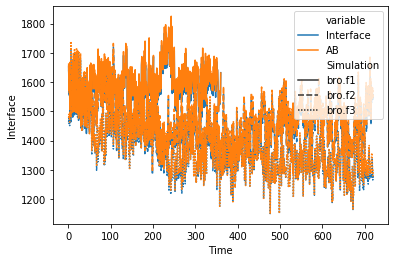

In [77]:
sns.lineplot(data=d2gi_melt, x="Time", y="Interface", hue="variable", style="Simulation")

,Time,Simulation,System,Frame,Interface_A,Interface_B,RAB-AB,variable,Interface
0,0.6,bro.f1,d2gi,1,1512.0,149.0,-7.0,Interface,1654.0
1,1.2,bro.f1,d2gi,2,1397.0,174.0,-11.0,Interface,1560.0
2,1.8,bro.f1,d2gi,3,1421.0,171.0,-5.0,Interface,1587.0
3,2.4,bro.f1,d2gi,4,1390.0,172.0,-8.0,Interface,1554.0
4,3.0,bro.f1,d2gi,5,1403.0,164.0,-9.0,Interface,1558.0
...,...,...,...,...,...,...,...,...,...
5995,717.6,bro.f3,d2gi,1196,1296.0,61.0,-17.0,AB,1357.0
5996,718.2,bro.f3,d2gi,1197,1260.0,72.0,-16.0,AB,1332.0
5997,718.8,bro.f3,d2gi,1198,1247.0,60.0,-12.0,AB,1307.0
5998,719.4,bro.f3,d2gi,1199,1247.0,32.0,-14.0,AB,1279.0


In [47]:
sns.lineplot()

,Interface,Interface_A,Interface_B,System,Simulation,Time,Frame,Difference
1799,1559.0,1486.0,86.0,d2gi,bro.f2,720.0,1200,-13.0
2999,1281.0,1264.0,36.0,d2gi,bro.f3,720.0,1200,-19.0


In [5]:
d2go = read_data("d2go", "bro")

In [6]:
d2go_mm = check_interface(d2go, "d2go")
len(d2go_mm)

14240

In [7]:
len(d2go)

20500

In [8]:
set(d2go_mm)

{'d2go_bro',
 'd2go_bro.1',
 'd2go_bro.2',
 'd2go_bro.3',
 'd2go_bro.4',
 'd2go_bro.5',
 'd2go_bro.f1',
 'd2go_bro.f2',
 'd2go_bro.f3'}

In [9]:
d3gi_prm = read_data("d3gi", "prm")
d3gi_prm_mm = check_interface(d3gi_prm, "d3gi")
len(d3gi_prm_mm)

0

In [10]:
d3go_prm = read_data("d3go", "prm")
d3go_prm_mm = check_interface(d3go_prm, "d3go")
len(d3go_prm_mm)

6450

In [11]:
len(d3go_prm)

15800

In [12]:
set(d3go_prm_mm)

{'d3go_prm.f1',
 'd3go_prm.f2',
 'd3go_prm.f3',
 'd3go_prm.f4',
 'd3go_prm.f5',
 'd3go_prm.f6'}

In [13]:
d3go_pd = read_data("d3go", "pd")
d3go_pd_mm = check_interface(d3go_pd, "d3go")
len(d3go_pd_mm)

3599

In [14]:
len(d3go_pd)

13600

In [15]:
set(d3go_pd_mm)

{'d3go_pd.f1',
 'd3go_pd.f2',
 'd3go_pd.f3',
 'd3go_pd.f4',
 'd3go_pd.f5',
 'd3go_pd.f6'}

In [16]:
d3gi_pd = read_data("d3gi", "pd")
d3gi_pd_mm = check_interface(d3gi_pd, "d3gi")
len(d3gi_pd_mm)

3244

In [17]:
len(d3gi_pd)

6800

In [18]:
set(d3gi_pd_mm)

{'d3gi_pd.f3', 'd3gi_pd.f4', 'd3gi_pd.f6'}

In [23]:
a = pickle.load(open("/home/khlee/work/desmond/output/d3go/prm/d3go_prm.f1/output/gpcr_interface.p", 'rb'))

In [24]:
b=pickle.load(open("/home/khlee/work/desmond/output/d3go/prm/d3go_prm.f1/output/gpcr_interface_RA.p", 'rb'))

In [25]:
c=pickle.load(open("/home/khlee/work/desmond/output/d3go/prm/d3go_prm.f1/output/gpcr_interface_RB.p", 'rb'))

In [30]:
a[0:5]

[1935.0, 1981.0, 1947.0, 1968.0, 1977.0]

In [32]:
b[0:5]

[1834.0, 1888.0, 1877.0, 1920.0, 1904.0]

In [33]:
c[0:5]

[101.0, 93.0, 71.0, 48.0, 73.0]